In [2]:
from random import random, choice
from core import Agent
from gym import Env
import gym
from gridworld import WindyGridWorld, SimpleGridWorld
from utils import str_key, set_dict, get_dict
from utils import epsilon_greedy_pi, epsilon_greedy_policy
from utils import greedy_policy, learning_curve

In [3]:
class SarsaAgent(Agent):
    def __init__(self, env:Env, capacity:int = 20000):
        super(SarsaAgent, self).__init__(env, capacity)
        self.Q = {}

    def policy(self, A, s, Q, epsilon):
        return epsilon_greedy_policy(A, s, Q, epsilon)

    def learning_method(self, gamma = 0.9, alpha = 0.1, epsilon = 1e-5, display = False, lambda_ = None):
        self.state = self.env.reset()
        s0 = self.state
        if display:
            self.env.render()
        a0 = self.perform_policy(s0, self.Q, epsilon)
        # print(self.action_t.name)
        time_in_episode, total_reward = 0, 0
        is_done = False
        while not is_done:
            # add code here
            s1, r1, is_done, info, total_reward = self.act(a0)
            if display:
                self.env.render()
            a1 = self.perform_policy(s1, self.Q, epsilon)
            old_q = get_dict(self.Q, s0, a0)
            q_prime = get_dict(self.Q, s1, a1)
            td_target = r1 + gamma * q_prime
            #alpha = alpha / num_episode
            new_q = old_q + alpha * (td_target - old_q)
            set_dict(self.Q, new_q, s0, a0)
            s0, a0 = s1, a1
            time_in_episode += 1
        if display:
            print(self.experience.last_episode)
        return time_in_episode, total_reward  


In [4]:
env = WindyGridWorld()
agent = SarsaAgent(env, capacity = 10000)

statistics = agent.learning(gamma = 1.0, 
                            epsilon = 1,
                            decaying_epsilon = True,
                            alpha = 0.5, 
                            max_episode_num = 800, 
                            display = False)


100%|██████████| 800/800 [00:00<00:00, 1230.20it/s]


In [5]:
agent.learning_method(epsilon = 0.01, display = True)

episode 801    19 steps,total reward:-18.00  


(19, -18)

No handles with labels found to put in legend.


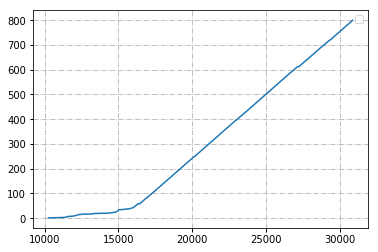

In [6]:
learning_curve(statistics, 0,2)
# 坐标中文显示不友好

In [7]:
env.reset()
env.render()
#env.close()

True

In [8]:
env.close()